# 1. Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# 2. Loading the Data

In [2]:
crypto = 'ADA-USD'

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 9, 2)

In [3]:
data = web.DataReader(crypto, 'yahoo', start, end)

In [4]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-29,2.885242,2.724317,2.850741,2.733160,5.221152e+09,2.733160
2021-08-30,2.877878,2.706473,2.737641,2.772475,5.085984e+09,2.772475
2021-08-31,2.902614,2.726327,2.769947,2.870767,4.652639e+09,2.870767
2021-09-01,3.099186,2.839781,2.869750,2.963438,7.376032e+09,2.963438
2021-09-02,3.029436,2.907606,2.959315,2.968239,5.244577e+09,2.968239


# 3. Preparing the Data

In [5]:
'''Normalizing the input features using MinMaxScaler. All the features will be transformed into the 
range [0,1] meaning that the minimum and maximum value of a variable are going to be 0 and 1.'''

'Normalizing the input features using MinMaxScaler. All the features will be transformed into the \nrange [0,1] meaning that the minimum and maximum value of a variable are going to be 0 and 1.'

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

'values.reshape(-1, 1) is like asking numpy to suggest us a number of columns or rows to get reshaped in'

'values.reshape(-1, 1) is like asking numpy to suggest us a number of columns or rows to get reshaped in'

In [7]:
'Furter we will choose the number of days that will help with the prediction'

'Furter we will choose the number of days that will help with the prediction'

In [8]:
prediction_days = 60

In [9]:
'Creating our training variables'

'Creating our training variables'

In [10]:
x_train = []
y_train = []

In [12]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
'Imagining the range like range(60, 607):'

'Imagining the range like range(60, 607):'

In [13]:
'Below, we converted the x_train and y_train to a Numpy Array'

'Below, we converted the x_train and y_train to a Numpy Array'

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.00322558, 0.00298545, 0.0034708 , ..., 0.00873695, 0.00837387,
        0.00800875],
       [0.00298545, 0.0034708 , 0.00361175, ..., 0.00837387, 0.00800875,
        0.00746227],
       [0.0034708 , 0.00361175, 0.00365455, ..., 0.00800875, 0.00746227,
        0.00848833],
       ...,
       [0.46968221, 0.48712213, 0.46902399, ..., 0.9618742 , 0.92015732,
        0.93351033],
       [0.48712213, 0.46902399, 0.47349197, ..., 0.92015732, 0.93351033,
        0.96689445],
       [0.46902399, 0.47349197, 0.46841942, ..., 0.93351033, 0.96689445,
        0.99836937]])

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.00322558],
        [0.00298545],
        [0.0034708 ],
        ...,
        [0.00873695],
        [0.00837387],
        [0.00800875]],

       [[0.00298545],
        [0.0034708 ],
        [0.00361175],
        ...,
        [0.00837387],
        [0.00800875],
        [0.00746227]],

       [[0.0034708 ],
        [0.00361175],
        [0.00365455],
        ...,
        [0.00800875],
        [0.00746227],
        [0.00848833]],

       ...,

       [[0.46968221],
        [0.48712213],
        [0.46902399],
        ...,
        [0.9618742 ],
        [0.92015732],
        [0.93351033]],

       [[0.48712213],
        [0.46902399],
        [0.47349197],
        ...,
        [0.92015732],
        [0.93351033],
        [0.96689445]],

       [[0.46902399],
        [0.47349197],
        [0.46841942],
        ...,
        [0.93351033],
        [0.96689445],
        [0.99836937]]])

# 4. Building the Model

#### LSTM - Long Short-Term Memory --> A type of recurrent neural network

In [16]:
'We attribute our Model to a Variable'

'We attribute our Model to a Variable'

In [17]:
'''The sequential API allows us to create models layer-by-layer for most problems. 
It is limited in that it does not allow us to create models that share layers or have multiple inputs or outputs.'''

'The sequential API allows us to create models layer-by-layer for most problems. \nIt is limited in that it does not allow us to create models that share layers or have multiple inputs or outputs.'

In [18]:
model = Sequential()

In [19]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

In [20]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [21]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(units=1))  # Prediction of the next closing price

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
18/18 [==============================] - 8s 20ms/step - loss: 0.0358
Epoch 2/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0064
Epoch 3/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0052
Epoch 4/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0036
Epoch 5/25
18/18 [==============================] - 0s 18ms/step - loss: 0.0037
Epoch 6/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0066
Epoch 7/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0040
Epoch 8/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0032
Epoch 9/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0032
Epoch 10/25
18/18 [==============================] - 0s 19ms/step - loss: 0.0042
Epoch 11/25
18/18 [==============================] - 0s 18ms/step - loss: 0.0034
Epoch 12/25
18/18 [==============================] - 0s 20ms/step - loss: 0.0031: 0s - loss: 0.00
Epoch 13/25
18/18 [=

# 5. Testing the Model

In [24]:
# Load Test Data
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

In [25]:
test_data = web.DataReader(crypto, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

In [26]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis = 0)

In [27]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [28]:
# Making prediction on the Testing Data

In [29]:
x_test = []

In [30]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [31]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

.

.

.

In [33]:
# Plot the Test Predictions

In [34]:
from matplotlib.pyplot import figure

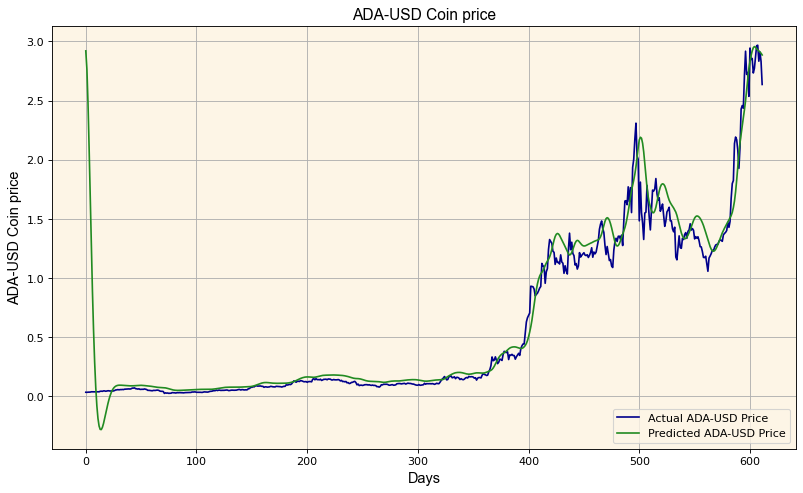

In [37]:
csfont = {'fontname':'Arial'}
hfont = {'fontname':'Arial'}

figure(figsize=(12, 7), dpi=80)
plt.plot(actual_prices, color='darkblue', label=f"Actual {crypto} Price")
plt.plot(predicted_prices, color='forestgreen', label=f"Predicted {crypto} Price")
plt.title(f"{crypto} Coin price", color = 'black', size = 14, **csfont)
plt.xlabel('Days', color = 'black', size = 13, **hfont)
plt.ylabel(f'{crypto} Coin price', color = 'black', size = 13, **hfont)
plt.legend()
plt.grid()
plt.show()

In [36]:
plt.rcParams['axes.facecolor'] = 'oldlace'

# 6. Price Prediction - Next Day

In [38]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]

In [39]:
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [40]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction {prediction}")

Prediction [[2.8565385]]
